In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # keep only necessary columns
df.columns = ['label', 'message']  # rename columns
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Encode labels

# Optional: clean text, remove stopwords, punctuation etc.

In [5]:
X = df['message']
y = df['label']

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [9]:
model = MultinomialNB(alpha=0.1)  # Try 0.1, 0.5, 1.0 etc.
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

Accuracy: 0.9820627802690582

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

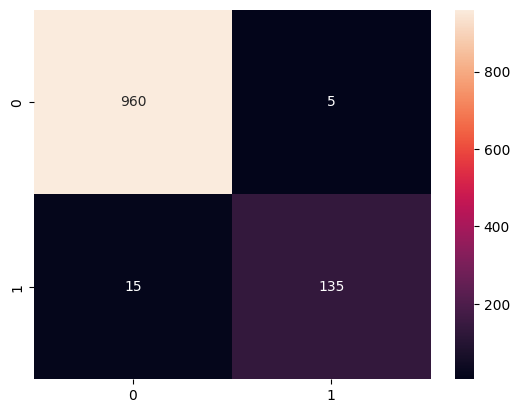

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [13]:
sample_email = ["""
Dear Mr. Ahmed,

I hope this email finds you well.

I am writing to follow up on our previous discussion regarding the upcoming milestones for the AI-powered health monitoring project. As per the revised timeline, we aim to complete the feature integration phase by July 15th and begin user testing shortly thereafter.

Kindly confirm if the backend team has completed the API integration, so we can proceed with front-end testing as scheduled. Please also let me know if there are any blockers or concerns from your side.

Looking forward to your response.

Best regards,  
Muhammad Huzaifa  
Project Engineer  
huzaifa.ai@domain.com
"""]

sample_vec = vectorizer.transform(sample_email)
prediction = model.predict(sample_vec)

print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")


Prediction: Ham
